In [4]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Load and clean data**

In [6]:
df = pd.read_csv('/Users/tracy/Documents/06_Data Science/climate change dataset/train.csv')
df_test = pd.read_csv('/Users/tracy/Documents/06_Data Science/climate change dataset/test.csv')

In [71]:
df.head(5)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
len(df) #number of tweets

15819

In [6]:
df.sentiment.value_counts() #distribution of pro to anti sentiments *BALANCE

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

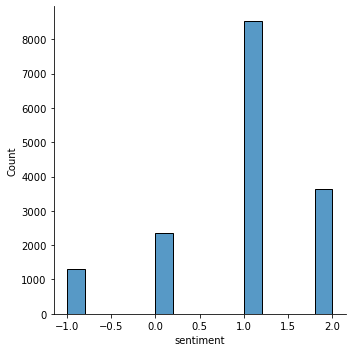

In [15]:
sns.displot(df, x='sentiment')

Normalise tweets to train model with

In [17]:
from sklearn.utils import resample

In [18]:
positive1 = df[df['sentiment']==1]
news2 = df[df['sentiment']==2]
neutral0 = df[df['sentiment']==0]
negative1 = df[df['sentiment']==-1]


In [19]:
# Downsample majority
positive1_downsampled = resample(positive1,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(negative1), # match number in minority class
                          random_state=27) # reproducible results
news2_downsampled = resample(news2,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(negative1), # match number in minority class
                          random_state=27) # reproducible results
neutral0_downsampled = resample(neutral0,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(negative1), # match number in minority class
                          random_state=27) # reproducible results


# Combine downsampled majority class with minority class
df_d = pd.concat([positive1_downsampled,news2_downsampled, neutral0_downsampled, negative1])



In [20]:
df_d.sentiment.value_counts() #distribution of sentiments

-1    1296
 2    1296
 1    1296
 0    1296
Name: sentiment, dtype: int64

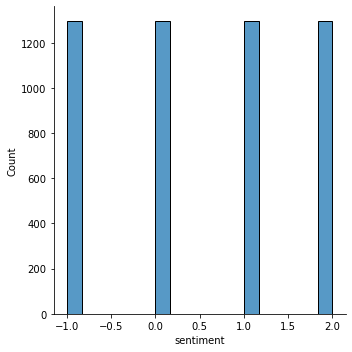

In [51]:
sns.displot(df_d, x='sentiment')

In [23]:
df_d.head()

,sentiment,message,tweetid
11729,1,RT @ubcforestry: Funding from @GenomeBC will s...,977844
8308,1,@YadiMoIina gag orders? Sure. He's definitely ...,441956
7159,1,RT @pattonoswalt: Not ominous at all! (He also...,978938
5644,1,RT @MelissaJPeltier: In case you forgot about ...,587737
6732,1,RT @SethMacFarlane: HRC proposes installing ha...,804767


In [24]:
len(df_d) 

5184

In [25]:
#remove empty strings
#blanks_test = []

#for i,msg, twid in df_test.itertuples():
    #if msg.isspace():
        #blanks_test.append(i) #returns index positions for where there is empty string in message col


In [26]:
#blanks_test

In [27]:
#df_test.drop(blanks_test, inplace = True)

# **Modelling**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df_d['message']
y = df_d['sentiment']

In [30]:
X.shape

(5184,)

In [31]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_vectorized, y,test_size=0.3, shuffle=True, stratify=y, random_state =17)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [34]:
text_clf = Pipeline([('clf', LinearSVC())])

In [35]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('clf', LinearSVC())])

In [36]:
predictions = text_clf.predict(X_val)

In [37]:
predictions

array([ 2,  2,  0, ..., -1,  0,  1])

In [58]:
type(predictions)

numpy.ndarray

# Checking the performance of our model on the validation set

In [61]:
datas = {'actual': y_val, 'predicted':predictions}

dfnew = pd.DataFrame(datas, columns = ['actual', 'predicted'])
print(dfnew)

       actual  predicted
13589       2          2
5151        2          2
4744        0          0
6646        1          1
2627       -1         -1
...       ...        ...
12413       1          1
600         2          2
14136      -1         -1
6867        2          0
6498        1          1

[1556 rows x 2 columns]


In [63]:
con_matrix = pd.crosstab(dfnew['actual'], dfnew['predicted'], rownames=['Actual'], colnames=['Predicted'])
print (con_matrix)

Predicted   -1    0    1    2
Actual                       
-1         276   65   28   20
 0          63  213   78   35
 1          42   74  201   72
 2           8   20   57  304


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

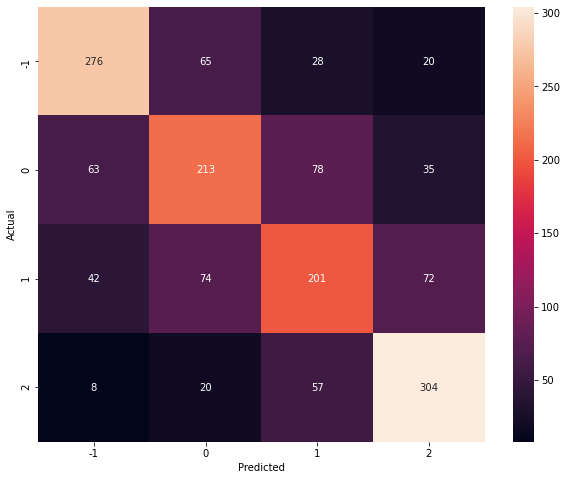

In [64]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(c_matrix, annot=True, fmt='d')

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [41]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

          -1       0.71      0.71      0.71       389
           0       0.57      0.55      0.56       389
           1       0.55      0.52      0.53       389
           2       0.71      0.78      0.74       389

    accuracy                           0.64      1556
   macro avg       0.63      0.64      0.64      1556
weighted avg       0.63      0.64      0.64      1556



In [42]:
f1_score(y_val, predictions, average="macro")

0.636157318729681

In [43]:
print(accuracy_score(y_val, predictions))

0.6388174807197944


**Getting our test set ready**

In [44]:
test_x = df_test['message']
test_vect = vectorizer.transform(test_x)

**Making predictions on the test set and adding a sentiment column to our original test df**

In [45]:
y_pred = text_clf.predict(test_vect)

In [46]:
df_test['sentiment'] = y_pred

In [47]:
df_test.head()

,message,tweetid,sentiment
0,Europe will now be looking to China to make su...,169760,2
1,Combine this with the polling of staffers re c...,35326,1
2,"The scary, unimpeachable evidence that climate...",224985,0
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,0
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,0


In [48]:
df_test['message'].iloc[2]

'The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..'

**Creating an output csv for submission**

In [49]:
df_test[['tweetid','sentiment']].to_csv('testsubmission_SVC_2.csv', index=False)